In [162]:
# Imports

from scipy import stats 
import numpy as np
import math
from math import e
from math import factorial
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
dados = pd.read_excel('carros.xlsx')

In [163]:
print(dados)

                                                  title price_in_aed  \
0                         MITSUBISHI PAJERO 3.5L / 2013       26,000   
1                                   chevrolet silverado      110,000   
2     MERCEDES-BENZ E300 - 2014 - GCC SPEC - FULL OP...       78,000   
3     WARRANTY UNTIL APR 2023 || Ferrari 488 Spider ...      899,000   
4                              USED RENAULT DOKKER 2020       33,000   
...                                                 ...          ...   
9965  AED7525month | 2015 Land Rover Range Rover Aut...      215,000   
9966             LOW MILEAGE Cadillac Escalade Platinum       90,000   
9967  WARRANTY AVAILABLE || Range Rover Sport SVR Ca...      679,000   
9968                         Chevrolet Malibu  GCC Spec       18,900   
9969  LOW MILEAGE! PERFECT CONDITION! Jeep Wrangler ...       77,700   

      kilometers                 body_condition    mechanical_condition  \
0         167390         Perfect inside and out  Perfect ins

Filtragem de Colunas

In [164]:
dados.drop(["seller_type", "no_of_cylinders", "regional_specs", "steering_side", "color", "emirate","motors_trim","model"], axis=1, inplace=True)
dados.head()

,title,price_in_aed,kilometers,body_condition,mechanical_condition,body_type,transmission_type,horsepower,fuel_type,year,company,date_posted
0,MITSUBISHI PAJERO 3.5L / 2013,"26,000",167390,Perfect inside and out,Perfect inside and out,SUV,Automatic Transmission,Unknown,Gasoline,2013.0,mitsubishi,13/05/2022
1,chevrolet silverado,"110,000",39000,Perfect inside and out,Perfect inside and out,SUV,Automatic Transmission,400 - 500 HP,Gasoline,2018.0,chevrolet,14/01/2022
2,MERCEDES-BENZ E300 - 2014 - GCC SPEC - FULL OP...,"78,000",200000,Perfect inside and out,Perfect inside and out,Sedan,Automatic Transmission,400 - 500 HP,Gasoline,2014.0,mercedes-benz,05/05/2022
3,WARRANTY UNTIL APR 2023 || Ferrari 488 Spider ...,"899,000",27000,Perfect inside and out,Perfect inside and out,Hard Top Convertible,Automatic Transmission,600 - 700 HP,Gasoline,2018.0,ferrari,30/04/2022
4,USED RENAULT DOKKER 2020,"33,000",69000,Perfect inside and out,Perfect inside and out,Wagon,Manual Transmission,Less than 150 HP,Gasoline,2020.0,renault,13/05/2022


Filtro de Marcas

In [165]:
marcas = ['nissan', 'audi', 'mercedes-benz', 'lamborghini', 'maserati', 'bmw', 'bentley','ferrari']
dados = dados.loc[dados.company.isin(marcas),:]
dados.head(10)

,title,price_in_aed,kilometers,body_condition,mechanical_condition,body_type,transmission_type,horsepower,fuel_type,year,company,date_posted
2,MERCEDES-BENZ E300 - 2014 - GCC SPEC - FULL OP...,"78,000",200000,Perfect inside and out,Perfect inside and out,Sedan,Automatic Transmission,400 - 500 HP,Gasoline,2014.0,mercedes-benz,05/05/2022
3,WARRANTY UNTIL APR 2023 || Ferrari 488 Spider ...,"899,000",27000,Perfect inside and out,Perfect inside and out,Hard Top Convertible,Automatic Transmission,600 - 700 HP,Gasoline,2018.0,ferrari,30/04/2022
5,A7 S-line Quattro. Under Warranty. Accidents F...,"98,000",84000,Perfect inside and out,Perfect inside and out,Sedan,Automatic Transmission,200 - 300 HP,Gasoline,2015.0,audi,30/04/2022
9,Warranty | 0 Down payment | Model 2013 | V6 en...,"35,999",111749,Perfect inside and out,Perfect inside and out,Van,Automatic Transmission,200 - 300 HP,Gasoline,2013.0,nissan,07/08/2021
10,Audi S8 TFSI quattro 570hp 2020 gcc Under Wa...,"389,000",50000,Perfect inside and out,Perfect inside and out,Sedan,Automatic Transmission,500 - 600 HP,Gasoline,2020.0,audi,24/02/2022
11,"2020 Mercedes G63 | 96,000 KM | GCC Spec | Ava...","750,000",96000,Perfect inside and out,Perfect inside and out,SUV,Automatic Transmission,500 - 600 HP,Gasoline,2020.0,mercedes-benz,12/04/2022
12,*Extended Warranty Available* I Mercedes-Benz ...,"329,000",31577,Perfect inside and out,Perfect inside and out,Coupe,Automatic Transmission,300 - 400 HP,Gasoline,2019.0,mercedes-benz,08/03/2022
15,AED4950/month | 2018 Maserati GranTurismo Spor...,"270,000",41309,Perfect inside and out,Perfect inside and out,Coupe,Automatic Transmission,400 - 500 HP,Gasoline,2018.0,maserati,17/04/2022
16,AED2325/month | 2020 Audi A6 2.0L | Full Audi ...,"155,000",73455,Perfect inside and out,Perfect inside and out,Sedan,Automatic Transmission,200 - 300 HP,Gasoline,2020.0,audi,13/05/2022
20,BMW 630i | Original Paint | GCC | Amazing Cond...,"30,000",169500,Perfect inside and out,Perfect inside and out,Coupe,Automatic Transmission,200 - 300 HP,Gasoline,2010.0,bmw,24/03/2022


Após a filtragem de marcas e colunas, iremos utilizar a planilha de dados com um total de 12 colunas e 3956 linhas, que inicialmente possuía 20 colunas e 9970 linhas.
As colunas são: Title, Price in aed, Kilometers, Body Condition, Mechanical Condition, Body Type, Transmission Type, Horsepower, Fuel Type. E as marcas: Nissan, Audi, Mercedes, Lamborghini, Maserati, Bmw, Bentley, Ferrari

Vendo as correlações

<AxesSubplot:xlabel='company', ylabel='price_in_aed'>

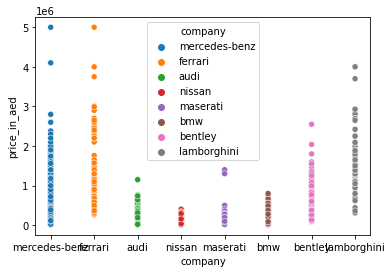

In [191]:
preco = dados['price_in_aed'].apply(lambda x: float(x.replace(".","").replace(",","")))
sns.scatterplot(data=dados, x="company", y=preco, hue= dados['company'])

In [189]:
#anoQuilometragem = dados.kilometers.corr(dados.year)

precoQuilometragem = preco.corr(dados.kilometers)
print(precoQuilometragem)


-0.3997980667660921


In [188]:
dados.groupby(dados['company'])['price_in_aed'].describe()

,count,unique,top,freq
company,,,,
audi,381,232,"60,000",8
bentley,144,109,"259,000",5
bmw,690,347,"89,000",10
ferrari,135,113,"699,000",3
lamborghini,108,82,"1,449,000",4
maserati,94,70,"135,000",4
mercedes-benz,1506,642,"129,000",16
nissan,898,333,"55,000",15


In [168]:
pd.crosstab(dados['price_in_aed'], dados['company'])

company,audi,bentley,bmw,ferrari,lamborghini,maserati,mercedes-benz,nissan
price_in_aed,,,,,,,,
"1,000,000",0,0,0,0,0,0,4,0
"1,009,999",0,0,0,0,0,0,1,0
"1,010,000",0,0,0,0,0,0,1,0
"1,019,000",0,0,0,0,0,0,1,0
"1,020,000",0,0,0,0,0,0,3,0
...,...,...,...,...,...,...,...,...
"99,500",0,0,0,0,0,1,0,2
"99,900",0,0,0,0,0,1,1,0
"99,999",0,0,1,0,0,0,1,0


In [169]:
pd.crosstab(dados['price_in_aed'], dados['body_condition'])

body_condition,"A bit of wear & tear, all repaired","No accidents, very few faults","Normal wear & tear, a few issues",Perfect inside and out
price_in_aed,,,,
"1,000,000",0,0,0,4
"1,009,999",0,0,0,1
"1,010,000",0,0,0,1
"1,019,000",0,0,0,1
"1,020,000",0,0,0,3
...,...,...,...,...
"99,500",0,0,0,3
"99,900",0,0,0,2
"99,999",0,0,0,2


In [170]:
pd.crosstab(dados['price_in_aed'], dados['body_type'])

body_type,Coupe,Crossover,Hard Top Convertible,Hatchback,Other,Pick Up Truck,SUV,Sedan,Soft Top Convertible,Sports Car,Utility Truck,Van,Wagon
price_in_aed,,,,,,,,,,,,,
"1,000,000",0,0,0,0,0,0,4,0,0,0,0,0,0
"1,009,999",0,0,0,0,0,0,1,0,0,0,0,0,0
"1,010,000",0,0,0,0,0,0,1,0,0,0,0,0,0
"1,019,000",0,0,0,0,0,0,1,0,0,0,0,0,0
"1,020,000",0,0,0,0,0,0,3,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
"99,500",0,0,0,0,0,0,1,2,0,0,0,0,0
"99,900",1,0,0,0,0,0,0,1,0,0,0,0,0
"99,999",0,0,0,0,0,0,0,2,0,0,0,0,0


In [183]:
pd.crosstab(dados['price_in_aed'], dados['transmission_type'])

transmission_type,Automatic Transmission,Manual Transmission
price_in_aed,,
"1,000,000",4,0
"1,009,999",1,0
"1,010,000",1,0
"1,019,000",1,0
"1,020,000",3,0
...,...,...
"99,500",3,0
"99,900",2,0
"99,999",2,0


In [184]:
pd.crosstab(dados['price_in_aed'], dados['horsepower'])

horsepower,150 - 200 HP,200 - 300 HP,300 - 400 HP,400 - 500 HP,500 - 600 HP,600 - 700 HP,700 - 800 HP,800 - 900 HP,900+ HP,Less than 150 HP,Unknown
price_in_aed,,,,,,,,,,,
"1,000,000",0,0,0,0,3,1,0,0,0,0,0
"1,009,999",0,0,0,0,1,0,0,0,0,0,0
"1,010,000",0,0,0,0,0,1,0,0,0,0,0
"1,019,000",0,0,0,0,1,0,0,0,0,0,0
"1,020,000",0,0,0,0,3,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
"99,500",0,0,1,0,2,0,0,0,0,0,0
"99,900",0,0,0,1,0,0,0,0,0,0,1
"99,999",1,1,0,0,0,0,0,0,0,0,0


In [185]:
pd.crosstab(dados['price_in_aed'], dados['year'])

year,1970.0,1972.0,1974.0,1980.0,1982.0,1983.0,1984.0,1987.0,1989.0,1991.0,...,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,2021.0
price_in_aed,,,,,,,,,,,,,,,,,,,,,
"1,009,999",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
"1,019,000",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
"1,029,000",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
"1,048,000",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
"1,049,000",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"99,500",0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,1,0,0,0,0
"99,900",0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
"99,999",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
